### Schätzergebnisse visualisieren

In [1]:
# Notwendige Bibliotheken importieren
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Laden der Ergebnisse für die Truncation Methode
trunc_A = pd.read_csv('Code/Simulationen mit DGP2/Lineare Regression als Outcome-Modell/Ergebnisse/results_trunc_A.csv')
trunc_E = pd.read_csv('Code/Simulationen mit DGP2/Lineare Regression als Outcome-Modell/Ergebnisse/results_trunc_E.csv')
trunc_G = pd.read_csv('Code/Simulationen mit DGP2/Lineare Regression als Outcome-Modell/Ergebnisse/results_trunc_G.csv')
# Laden der Ergebnisse für die Discarding Methode
disc_A = pd.read_csv('Code/Simulationen mit DGP2/Lineare Regression als Outcome-Modell/Ergebnisse/results_disc_A.csv')
disc_E = pd.read_csv('Code/Simulationen mit DGP2/Lineare Regression als Outcome-Modell/Ergebnisse/results_disc_E.csv')
disc_G = pd.read_csv('Code/Simulationen mit DGP2/Lineare Regression als Outcome-Modell/Ergebnisse/results_disc_G.csv')

# Zusammenfassen der Ergebnisse
results_trunc = pd.concat([trunc_A, trunc_E, trunc_G], ignore_index=True)
results_disc = pd.concat([disc_A, disc_E, disc_G], ignore_index=True)


#### Truncation

In [5]:
# Die mittlere absolute Verzerrung, Varianz des Schätzers, MSE und Coverage für verschiedene Schwellenwerte speichern
result_trunc3 = []
learner_list = ['LogisticRegressionCV()', 'RandomForestClassifier()', 'GradientBoostingClassifier()']
scenario_list = ['A', 'E', 'G']
# Ergebnisse für die Truncation Methode für verschiedene Szenarien berechnen und speichern
for scenario in scenario_list:
    result_scnr = results_trunc[results_trunc.scenario == scenario]
    for learner in learner_list:
        res = result_scnr[result_scnr.learner == learner]
        for trim_value in [0.001, 0.01, 0.05, 0.1]:
            # Durchschnittlichen Anteil der getrimmten Beobachtungen berechnen
            mean_share_trim_top = res.loc[res['trim_value'] == trim_value, 'share_trimmed_top'].mean()
            mean_share_trim_bottom  = res.loc[res['trim_value'] == trim_value, 'share_trimmed_bottom'].mean()                 
            mean_share_trim_orcl_top = res.loc[res.trim_value == trim_value, 'share_trim_orcl_top'].mean()
            mean_share_trim_orcl_bottom = res.loc[res.trim_value == trim_value, 'share_trim_orcl_bottom'].mean()   
            # Durchschnittlichen Anteil der behandelten Beobachtungen berechnen
            mean_share_treated = res.loc[res['trim_value'] == trim_value, 'share_treated'].mean()
            # Mittlere absolute Verzerrung, Varianz des Schätzers, MSE und Coverage berechnen
            mean_abs_bias = res.loc[res['trim_value'] == trim_value, 'abs_bias'].mean()
            mean_std_err = res.loc[res['trim_value'] == trim_value, 'std err'].mean()
            var = res.loc[res['trim_value'] == trim_value, 'coef'].var()
            mse = (res.loc[res['trim_value'] == trim_value, 'bias'].pow(2)).mean()
            cov = res.loc[res['trim_value'] == trim_value, 'in_ci'].mean()
            # Umbenennung der Spaltenwerte
            if learner == 'LogisticRegressionCV()':
                methods = 'Linear + Logit'
            elif learner == 'RandomForestClassifier()':
                methods = 'Linear + RF'
            else:
                methods = 'Linear + GBoost'
            rows = {
                'scenario': scenario,
                'learner': methods + ' Truncation',
                'trim_value': trim_value,
                'mean_share_trim_top' : mean_share_trim_top,
                'mean_share_trim_bottom': mean_share_trim_bottom,
                'mean_share_trim': mean_share_trim_top + mean_share_trim_bottom,                
                'mean_share_trim_orcl_top': mean_share_trim_orcl_top,
                'mean_share_trim_orcl_bottom': mean_share_trim_orcl_bottom,
                'mean_share_trim_orcl': mean_share_trim_orcl_top + mean_share_trim_orcl_bottom,
                'mean_share_treated': mean_share_treated,
                'mean_abs_bias': mean_abs_bias,
                'mean_std_err': mean_std_err,
                'var': var,
                'MSE': mse,
                'coverage': cov,
                'mean_loss_g0': res.loc[res['trim_value'] == trim_value, 'loss_g0'].mean(),
                'mean_loss_g1': res.loc[res['trim_value'] == trim_value, 'loss_g1'].mean(),
                'mean_loss_m': res.loc[res['trim_value'] == trim_value, 'loss_m'].mean()
            }
            result_trunc3.append(rows)
df_trunc = pd.DataFrame(result_trunc3)

In [6]:
# Aufrunden der Ergebnisse für die Truncation Methode
df_trunc_round = df_trunc.round({'mean_share_trim_top': 2, 'mean_share_trim_bottom': 2, 'mean_share_trim': 2, 'mean_share_trim_orcl_top': 2, 'mean_share_trim_orcl_bottom': 2, 'mean_share_trim_orcl': 2, 'mean_share_treated': 2, 'mean_abs_bias': 4, 'mean_std_err': 4, 'var': 4, 'MSE': 4, 'coverage': 4, 'mean_loss_g0': 4, 'mean_loss_g1': 4, 'mean_loss_m': 4})

#### Discarding

In [7]:
# Die mittlere absolute Verzerrung, Varianz des Schätzers, MSE und Coverage für verschiedene Schwellenwerte speichern
result_discard3 = []
# Ergebnisse für die Discarding Strategie für verschiedene Szenarien speichern
for scenario in scenario_list:
    result_scnr = results_disc[results_disc.scenario == scenario]
    for learner in learner_list:
        res = result_scnr[result_scnr.learner == learner]
        for trim_value in [0.001, 0.01, 0.05, 0.1]:
            # Durchschnittlichen Anteil der discarded Beobachtungen berechnen
            mean_share_trim_top = res.loc[res['trim_value'] == trim_value, 'share_trimmed_top'].mean()
            mean_share_trim_bottom  = res.loc[res['trim_value'] == trim_value, 'share_trimmed_bottom'].mean()
            mean_share_trim_orcl_top = res.loc[res.trim_value == trim_value, 'share_trim_orcl_top'].mean()
            mean_share_trim_orcl_bottom = res.loc[res.trim_value == trim_value, 'share_trim_orcl_bottom'].mean() 
            # Durchschnittlichen Anteil der behandelten Beobachtungen berechnen
            mean_share_treated_pop = res.loc[res['trim_value'] == trim_value, 'share_treated_pop'].mean()
            mean_share_treated_sample = res.loc[res['trim_value'] == trim_value, 'share_treated_sample'].mean()
            # Mittlere absolute Verzerrung, Varianz des Schätzers, MSE und Coverage berechnen
            mean_abs_bias = res.loc[res['trim_value'] == trim_value, 'abs_bias'].mean()
            mean_std_err = res.loc[res['trim_value'] == trim_value, 'std err'].mean()
            var = res.loc[res['trim_value'] == trim_value, 'coef'].var()
            mse = (res.loc[res['trim_value'] == trim_value, 'bias'].pow(2)).mean()
            cov = res.loc[res['trim_value'] == trim_value, 'in_ci'].mean()
            # Umbenennung der Spaltenwerte
            if learner == 'LogisticRegressionCV()':
                methods = 'Linear + Logit'
            elif learner == 'RandomForestClassifier()':
                methods = 'Linear + RF'
            else:
                methods = 'Linear + GBoost'
            rows = {                      
                'scenario': scenario,          
                'learner': methods + ' Discarding',
                'trim_value': trim_value,
                'mean_share_trim_top' : mean_share_trim_top,
                'mean_share_trim_bottom': mean_share_trim_bottom,
                'mean_share_trim': mean_share_trim_top + mean_share_trim_bottom,
                'mean_share_trim_orcl_top': mean_share_trim_orcl_top,
                'mean_share_trim_orcl_bottom': mean_share_trim_orcl_bottom,
                'mean_share_trim_orcl': mean_share_trim_orcl_top + mean_share_trim_orcl_bottom,
                'mean_share_treated_pop': mean_share_treated_pop,
                'mean_share_treated_sample': mean_share_treated_sample,
                'mean_abs_bias': mean_abs_bias,
                'mean_std_err': mean_std_err,
                'var': var,
                'MSE': mse,
                'coverage': cov,
                'mean_loss_g0': res.loc[res['trim_value'] == trim_value, 'loss_g0'].mean(),
                'mean_loss_g1': res.loc[res['trim_value'] == trim_value, 'loss_g1'].mean(),
                'mean_loss_m': res.loc[res['trim_value'] == trim_value, 'loss_m'].mean()
            }
            rows
            result_discard3.append(rows)
df_disc= pd.DataFrame(result_discard3)

In [8]:
# Aufrunden der Ergebnisse für die Discarding Methode
df_disc_round = df_disc.round({'mean_share_trim_top': 2, 'mean_share_trim_bottom': 2, 'mean_share_trim': 2, 'mean_share_trim_orcl_top': 2, 'mean_share_trim_orcl_bottom': 2, 'mean_share_trim_orcl': 2, 'mean_share_treated_pop': 2, 'mean_share_treated_sample': 2, 'mean_abs_bias': 4, 'mean_std_err': 4, 'var': 4, 'MSE': 4, 'coverage': 4, 'mean_loss_g0': 4, 'mean_loss_g1': 4, 'mean_loss_m': 4})

#### Schätzergebnisse visualisieren

In [9]:
# Wegen identischer Werte für ml_g1 und ml_g0 mit RF und GradBoost, werden Werte mit RF leicht verschoben
df_trunc.loc[df_trunc.learner == 'Linear + GBoost Truncation', 'mean_loss_g1'] += 0.00015
df_trunc.loc[df_trunc.learner == 'Linear + GBoost Truncation', 'mean_loss_g0'] += 0.00015

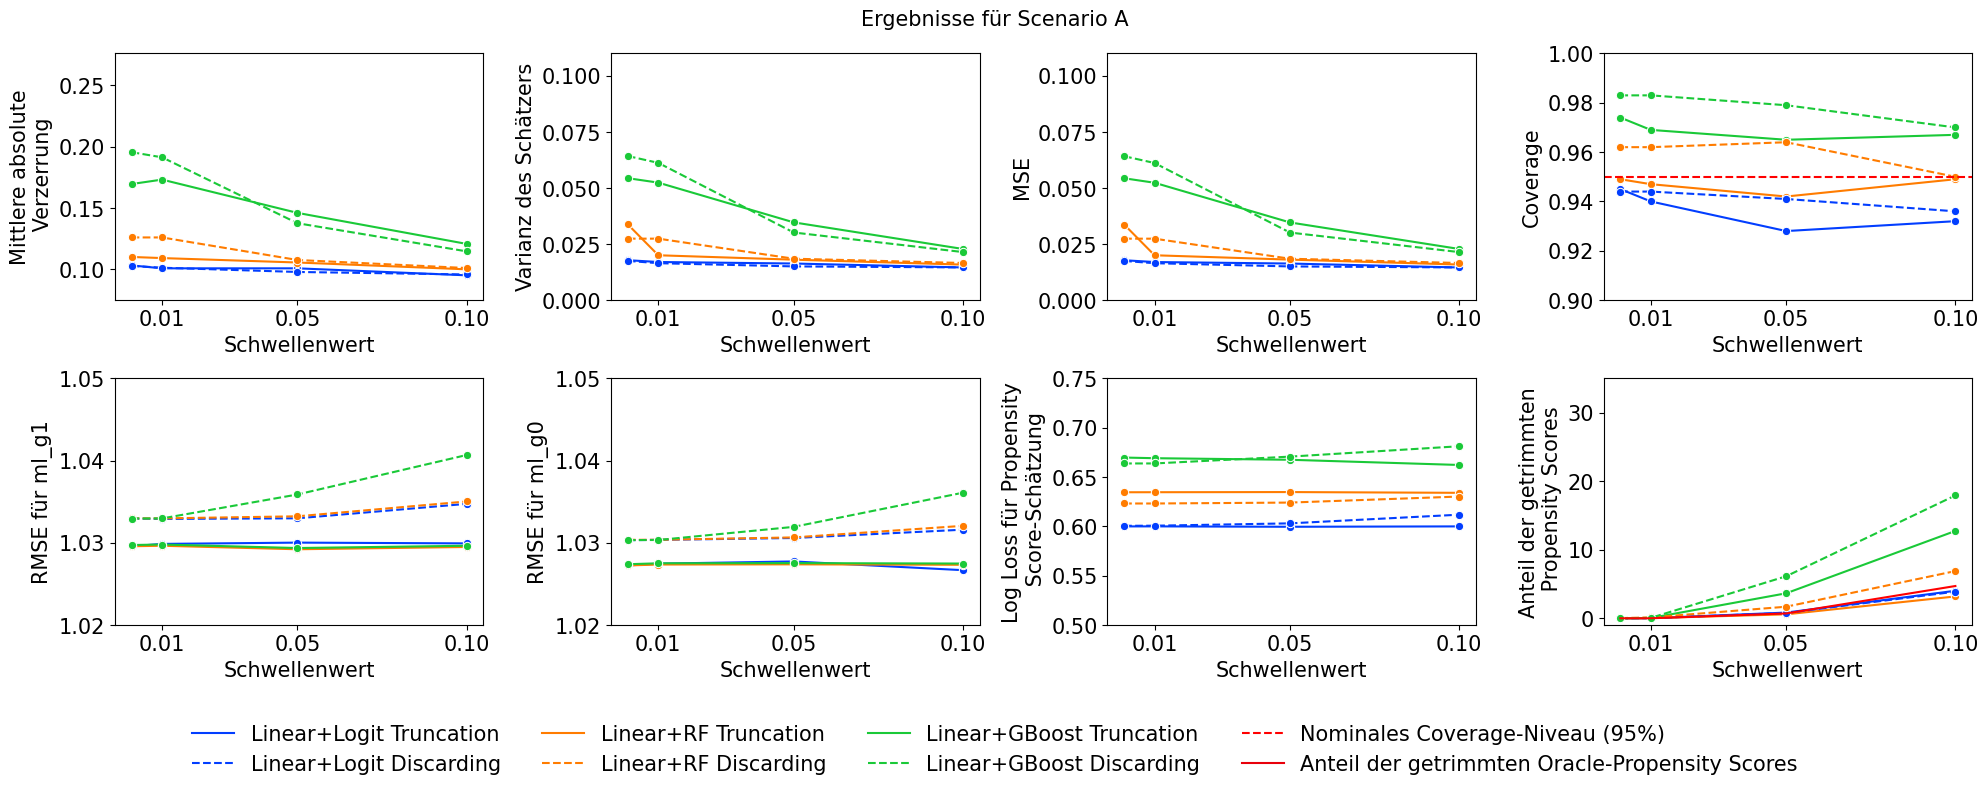

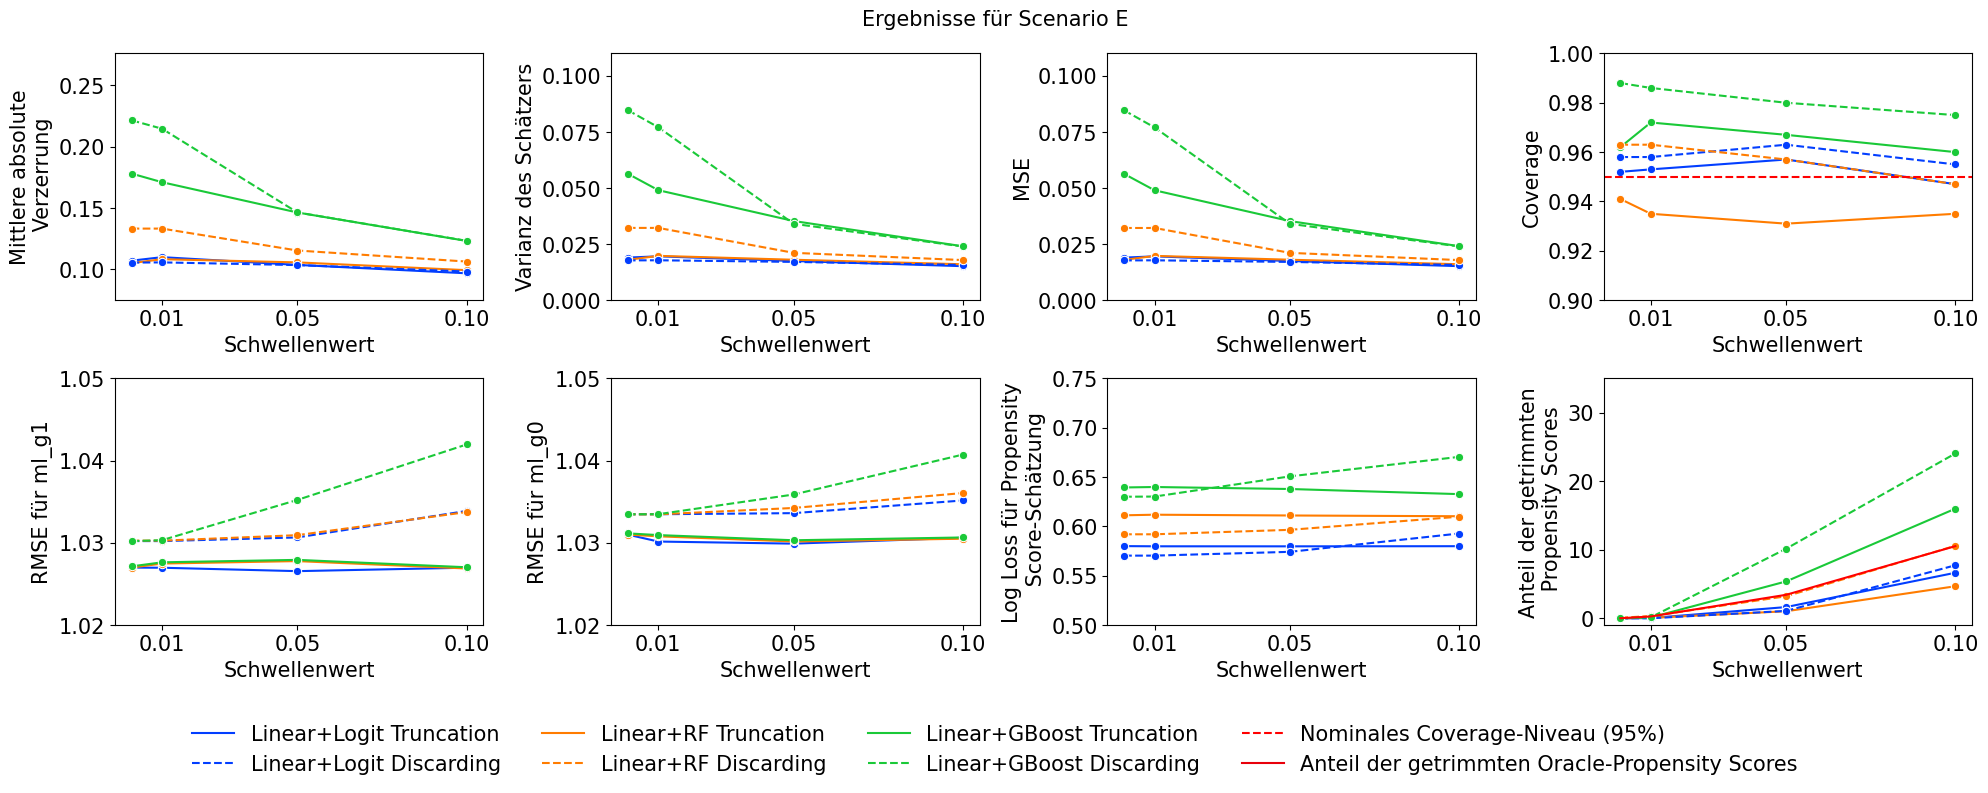

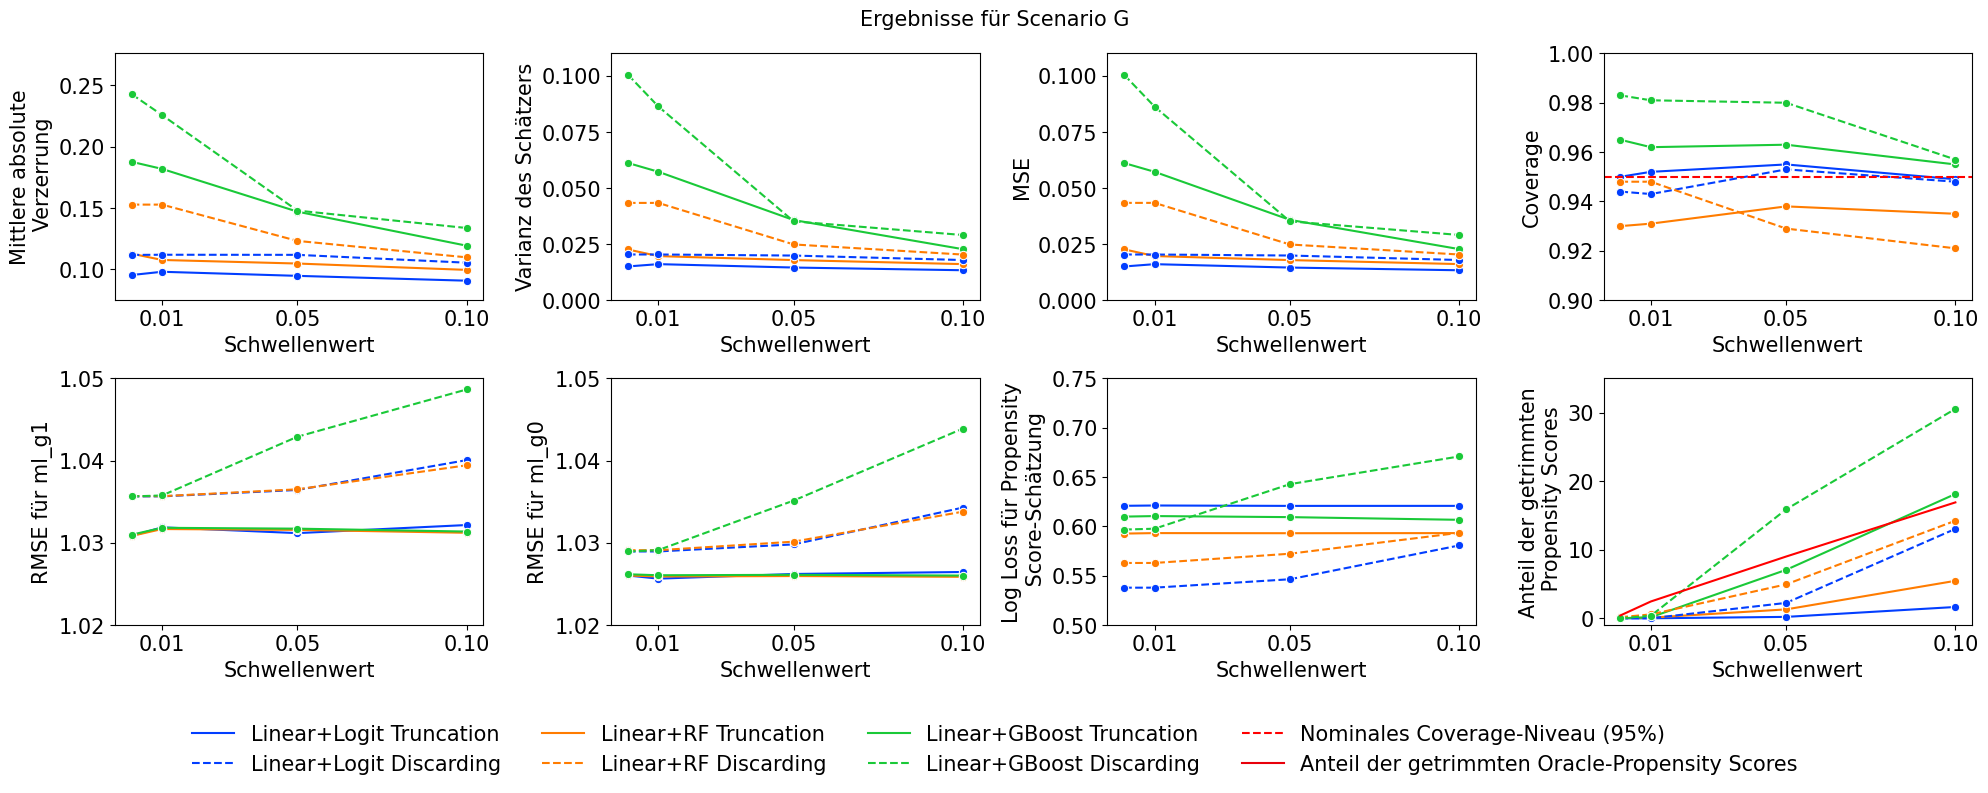

In [14]:
# plotten die mittlere absolute Verzerrung, Varianz des Schätzers, MSE und Coverage für verschiedene Schwellenwerte und Scenarien
for scenario in scenario_list:
    df_trunc_scnr = df_trunc[df_trunc['scenario'] == scenario]
    df_discard_scnr = df_disc[df_disc['scenario'] == scenario]
    fig, ax = plt.subplots(2, 4, figsize=(20, 7))
    axes = ax.flatten()

    # Schriftgröße für die Achsenbeschriftung
    for a in axes:
        a.tick_params(axis='both', labelsize=15)
        xticks = [0.01, 0.05, 0.1]
        a.set_xticks(xticks)

    # Plot der mittleren absoluten Verzerrung
    sns.lineplot(x='trim_value', y='mean_abs_bias', hue='learner', data=df_trunc_scnr, ax=axes[0], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_abs_bias', hue='learner', data=df_discard_scnr, ax=axes[0], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[0].set_xlabel('Schwellenwert', fontsize=15)
    axes[0].set_ylabel('Mittlere absolute\n Verzerrung', fontsize=15)
    axes[0].set_ylim(0.075, 0.276)
    
    # Plot der Varianz des Schätzers 
    sns.lineplot(x='trim_value', y='var', hue='learner', data=df_trunc_scnr, ax=axes[1], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='var', hue='learner', data=df_discard_scnr, ax=axes[1], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[1].set_xlabel('Schwellenwert', fontsize=15)
    axes[1].set_ylabel('Varianz des Schätzers', fontsize=15)
    axes[1].set_ylim(0.0, 0.11)
    
    # MSE
    sns.lineplot(x='trim_value', y='MSE', data=df_trunc_scnr, hue='learner', ax=axes[2], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='MSE', data=df_discard_scnr, hue='learner', ax=axes[2], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[2].set_xlabel('Schwellenwert', fontsize=15)
    axes[2].set_ylabel('MSE', fontsize=15)
    axes[2].set_ylim(0.0, 0.11)
    
    # Coverage
    sns.lineplot(x='trim_value', y='coverage', data=df_trunc_scnr, hue='learner', ax=axes[3], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='coverage', data=df_discard_scnr, hue='learner', ax=axes[3], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[3].set_xlabel('Schwellenwert', fontsize=15)
    axes[3].axhline(y=0.95, color='red', linestyle='--', label='Nominales Coverage-Niveau (95%)')
    axes[3].set_ylabel('Coverage', fontsize=15)
    axes[3].set_ylim(0.90, 1.0)
    
    # Durchschnittlicher Verlust für die Behandlungsgruppe ml_g1
    sns.lineplot(x='trim_value', y='mean_loss_g0', data=df_trunc_scnr, hue='learner', ax=axes[4], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_loss_g0', data=df_discard_scnr, hue='learner', ax=axes[4], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[4].set_xlabel('Schwellenwert', fontsize=15)
    axes[4].set_ylabel('RMSE für ml_g1', fontsize=15)
    axes[4].set_ylim(1.02, 1.05)
    
    # Durchschnittlicher Verlust für die Kontrollgruppe ml_g0
    sns.lineplot(x='trim_value', y='mean_loss_g1', data=df_trunc_scnr, hue='learner', ax=axes[5], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_loss_g1', data=df_discard_scnr, hue='learner', ax=axes[5], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[5].set_xlabel('Schwellenwert', fontsize=15)
    axes[5].set_ylabel('RMSE für ml_g0', fontsize=15)
    axes[5].set_ylim(1.02, 1.05)
    
    # Durchschnittlicher Log Loss für die Propensity Score-Schätzung
    sns.lineplot(x='trim_value', y='mean_loss_m', data=df_trunc_scnr, hue='learner', ax=axes[6], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_loss_m', data=df_discard_scnr, hue='learner', ax=axes[6], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[6].set_xlabel('Schwellenwert', fontsize=15)
    axes[6].set_ylabel('Log Loss für Propensity\n Score-Schätzung', fontsize=15)
    axes[6].set_ylim(0.5, 0.75)
    
    # Durchschnittlicher Anteil der getrimmten Propensity Score-Werte/Beobachtungen
    g=sns.lineplot(x='trim_value', y='mean_share_trim', data=df_trunc_scnr, hue='learner', ax=axes[7], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_share_trim', data=df_discard_scnr, hue='learner', ax=axes[7], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[7].plot(df_trunc_scnr.loc[df_trunc_scnr.learner == 'Linear + Logit Truncation']['trim_value'].iloc[0:4], df_trunc_scnr.loc[df_trunc_scnr.learner == 'Linear + Logit Truncation']['mean_share_trim_orcl'].iloc[0:4], linestyle='-', color='red')
    axes[7].set_xlabel('Schwellenwert', fontsize=15)
    axes[7].set_ylabel('Anteil der getrimmten\n Propensity Scores', fontsize=15)
    axes[7].set_ylim(-1, 35)
    
    # Farben aus der 'bright'-Palette extrahieren
    colors = sns.color_palette('bright')

    # Manuelle Legende mit durchgezogenen und gestrichelten Linien
    handles = [
        Line2D([0], [0], color=colors[0], linestyle='-', label='Linear+Logit Truncation'),
        Line2D([0], [0], color=colors[0], linestyle='--', label='Linear+Logit Discarding'),
        Line2D([0], [0], color=colors[1], linestyle='-', label='Linear+RF Truncation'),
        Line2D([0], [0], color=colors[1], linestyle='--', label='Linear+RF Discarding'),
        Line2D([0], [0], color=colors[2], linestyle='-', label='Linear+GBoost Truncation'),
        Line2D([0], [0], color=colors[2], linestyle='--', label='Linear+GBoost Discarding'),
        Line2D([0], [0], color='red', linestyle='--', label='Nominales Coverage-Niveau (95%)'),
        Line2D([0], [0], color=colors[3], linestyle='-', label='Anteil der getrimmten Oracle-Propensity Scores')] 
    
    # Legende korrekt platzieren
    fig.legend(handles=handles, loc='lower center',  fontsize=15, bbox_to_anchor=(0.5, -0.14), ncols=4, frameon=False)
    fig.suptitle(f'Ergebnisse für Scenario {scenario}', fontsize = 15)
    fig .tight_layout()

In [9]:
# Ergebnisse für die Truncation Methode für das Szenario A anzeigen
df_trunc_round[df_trunc_round['scenario'] == 'A'].reset_index(drop=True)

,scenario,learner,trim_value,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim_orcl,mean_share_treated,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,A,Linear + Logit Truncation,0.001,0.00,0.00,0.00,0.00,0.00,0.00,51.07,0.1033,0.1245,0.0178,0.0178,0.945,1.0296,1.0273,0.6000
1,A,Linear + Logit Truncation,0.010,0.01,0.01,0.01,0.00,0.00,0.00,51.07,0.1009,0.1238,0.0170,0.0170,0.940,1.0299,1.0275,0.6001
2,A,Linear + Logit Truncation,0.050,0.47,0.36,0.83,0.41,0.30,0.70,51.07,0.1009,0.1206,0.0163,0.0163,0.928,1.0300,1.0277,0.5997
3,A,Linear + Logit Truncation,0.100,2.24,1.77,4.02,2.62,2.08,4.71,51.07,0.0952,0.1153,0.0146,0.0146,0.932,1.0299,1.0267,0.6001
4,A,Linear + RF Truncation,0.001,0.00,0.00,0.00,0.00,0.00,0.00,51.07,0.1102,0.1373,0.0338,0.0337,0.949,1.0296,1.0273,0.6346
5,A,Linear + RF Truncation,0.010,0.01,0.01,0.02,0.00,0.00,0.00,51.07,0.1093,0.1354,0.0200,0.0200,0.947,1.0297,1.0274,0.6347
6,A,Linear + RF Truncation,0.050,0.34,0.23,0.58,0.41,0.30,0.70,51.07,0.1057,0.1303,0.0180,0.0181,0.942,1.0292,1.0274,0.6348
7,A,Linear + RF Truncation,0.100,1.80,1.39,3.19,2.62,2.08,4.71,51.07,0.1001,0.1238,0.0158,0.0159,0.949,1.0295,1.0273,0.6341
8,A,Linear + GBoost Truncation,0.001,0.00,0.00,0.00,0.00,0.00,0.00,51.07,0.1696,0.2323,0.0544,0.0543,0.974,1.0296,1.0273,0.6698
9,A,Linear + GBoost Truncation,0.010,0.02,0.02,0.04,0.00,0.00,0.00,51.07,0.1732,0.2302,0.0524,0.0523,0.969,1.0297,1.0274,0.6692


In [10]:
# Ergebnisse für die Truncation Methode für das Szenario E anzeigen
df_trunc_round[df_trunc_round['scenario'] == 'E'].reset_index(drop=True)

,scenario,learner,trim_value,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim_orcl,mean_share_treated,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,E,Linear + Logit Truncation,0.001,0.00,0.00,0.00,0.00,0.01,0.01,46.91,0.1072,0.1354,0.0190,0.0190,0.952,1.0270,1.0310,0.5801
1,E,Linear + Logit Truncation,0.010,0.01,0.02,0.03,0.00,0.26,0.26,46.91,0.1100,0.1366,0.0195,0.0195,0.953,1.0270,1.0302,0.5799
2,E,Linear + Logit Truncation,0.050,0.56,1.08,1.64,0.52,2.90,3.43,46.91,0.1037,0.1318,0.0174,0.0174,0.957,1.0266,1.0299,0.5798
3,E,Linear + Logit Truncation,0.100,2.41,4.23,6.64,2.98,7.55,10.53,46.91,0.0969,0.1230,0.0151,0.0152,0.947,1.0270,1.0306,0.5800
4,E,Linear + RF Truncation,0.001,0.00,0.01,0.01,0.00,0.01,0.01,46.91,0.1052,0.1283,0.0180,0.0179,0.941,1.0270,1.0310,0.6113
5,E,Linear + RF Truncation,0.010,0.01,0.06,0.07,0.00,0.26,0.26,46.91,0.1083,0.1312,0.0197,0.0197,0.935,1.0275,1.0308,0.6119
6,E,Linear + RF Truncation,0.050,0.25,0.78,1.03,0.52,2.90,3.43,46.91,0.1058,0.1267,0.0180,0.0180,0.931,1.0278,1.0302,0.6111
7,E,Linear + RF Truncation,0.100,1.44,3.23,4.67,2.98,7.55,10.53,46.91,0.0994,0.1222,0.0160,0.0160,0.935,1.0269,1.0305,0.6103
8,E,Linear + GBoost Truncation,0.001,0.00,0.00,0.00,0.00,0.01,0.01,46.91,0.1781,0.2297,0.0563,0.0563,0.962,1.0270,1.0310,0.6395
9,E,Linear + GBoost Truncation,0.010,0.02,0.10,0.12,0.00,0.26,0.26,46.91,0.1711,0.2231,0.0490,0.0490,0.972,1.0275,1.0308,0.6400


In [11]:
# Ergebnisse für die Truncation Methode für das Szenario G anzeigen
df_trunc_round[df_trunc_round['scenario'] == 'G'].reset_index(drop=True)

,scenario,learner,trim_value,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim_orcl,mean_share_treated,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,G,Linear + Logit Truncation,0.001,0.00,0.00,0.00,0.32,0.09,0.41,54.49,0.0954,0.1219,0.0150,0.0150,0.950,1.0308,1.0260,0.6209
1,G,Linear + Logit Truncation,0.010,0.00,0.00,0.00,1.69,0.76,2.45,54.49,0.0981,0.1224,0.0161,0.0160,0.952,1.0319,1.0257,0.6212
2,G,Linear + Logit Truncation,0.050,0.17,0.04,0.20,5.68,3.33,9.01,54.49,0.0948,0.1206,0.0145,0.0145,0.955,1.0312,1.0262,0.6208
3,G,Linear + Logit Truncation,0.100,1.27,0.38,1.65,10.36,6.55,16.91,54.49,0.0908,0.1146,0.0133,0.0133,0.949,1.0322,1.0265,0.6209
4,G,Linear + RF Truncation,0.001,0.02,0.01,0.02,0.32,0.09,0.41,54.49,0.1129,0.1337,0.0226,0.0226,0.930,1.0308,1.0260,0.5928
5,G,Linear + RF Truncation,0.010,0.07,0.03,0.10,1.69,0.76,2.45,54.49,0.1077,0.1334,0.0196,0.0197,0.931,1.0317,1.0259,0.5933
6,G,Linear + RF Truncation,0.050,0.93,0.37,1.30,5.68,3.33,9.01,54.49,0.1048,0.1272,0.0179,0.0179,0.938,1.0316,1.0260,0.5931
7,G,Linear + RF Truncation,0.100,3.78,1.69,5.47,10.36,6.55,16.91,54.49,0.0996,0.1202,0.0161,0.0161,0.935,1.0312,1.0259,0.5933
8,G,Linear + GBoost Truncation,0.001,0.00,0.00,0.00,0.32,0.09,0.41,54.49,0.1877,0.2354,0.0612,0.0611,0.965,1.0308,1.0260,0.6100
9,G,Linear + GBoost Truncation,0.010,0.10,0.05,0.15,1.69,0.76,2.45,54.49,0.1819,0.2354,0.0572,0.0572,0.962,1.0317,1.0259,0.6105


In [12]:
# Ergebnisse für die Discarding Methode für das Szenario A anzeigen
df_disc_round[df_disc_round['scenario'] == 'A'].reset_index(drop=True)

,scenario,learner,trim_value,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim_orcl,mean_share_treated_pop,mean_share_treated_sample,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,A,Linear + Logit Discarding,0.001,0.00,0.00,0.00,0.00,0.00,0.00,51.07,51.07,0.1029,0.1248,0.0175,0.0175,0.944,1.0330,1.0303,0.6007
1,A,Linear + Logit Discarding,0.010,0.02,0.01,0.03,0.00,0.00,0.00,51.07,51.07,0.1014,0.1237,0.0165,0.0165,0.944,1.0329,1.0304,0.6008
2,A,Linear + Logit Discarding,0.050,0.44,0.33,0.77,0.41,0.30,0.70,51.07,51.03,0.0980,0.1192,0.0150,0.0150,0.941,1.0330,1.0306,0.6031
3,A,Linear + Logit Discarding,0.100,2.14,1.75,3.89,2.62,2.08,4.71,51.07,50.95,0.0959,0.1149,0.0146,0.0146,0.936,1.0347,1.0316,0.6119
4,A,Linear + RF Discarding,0.001,0.02,0.01,0.03,0.00,0.00,0.00,51.07,51.07,0.1261,0.1661,0.0274,0.0274,0.962,1.0330,1.0304,0.6233
5,A,Linear + RF Discarding,0.010,0.07,0.06,0.13,0.00,0.00,0.00,51.07,51.07,0.1261,0.1661,0.0274,0.0274,0.962,1.0330,1.0304,0.6233
6,A,Linear + RF Discarding,0.050,0.96,0.73,1.69,0.41,0.30,0.70,51.07,51.03,0.1077,0.1460,0.0185,0.0185,0.964,1.0332,1.0307,0.6242
7,A,Linear + RF Discarding,0.100,3.83,3.06,6.89,2.62,2.08,4.71,51.07,50.87,0.1012,0.1317,0.0166,0.0166,0.950,1.0350,1.0321,0.6303
8,A,Linear + GBoost Discarding,0.001,0.00,0.00,0.00,0.00,0.00,0.00,51.07,51.07,0.1955,0.2748,0.0642,0.0642,0.983,1.0330,1.0303,0.6638
9,A,Linear + GBoost Discarding,0.010,0.03,0.03,0.06,0.00,0.00,0.00,51.07,51.07,0.1914,0.2702,0.0612,0.0611,0.983,1.0330,1.0304,0.6638


In [13]:
# Ergebnisse für die Discarding Methode für das Szenario G anzeigen
df_disc_round[df_disc_round['scenario'] == 'E'].reset_index(drop=True)

,scenario,learner,trim_value,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim_orcl,mean_share_treated_pop,mean_share_treated_sample,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,E,Linear + Logit Discarding,0.001,0.00,0.00,0.00,0.00,0.01,0.01,46.91,46.91,0.1056,0.1371,0.0177,0.0177,0.958,1.0302,1.0335,0.5704
1,E,Linear + Logit Discarding,0.010,0.00,0.00,0.00,0.00,0.26,0.26,46.91,46.91,0.1058,0.1370,0.0178,0.0178,0.958,1.0302,1.0335,0.5704
2,E,Linear + Logit Discarding,0.050,0.31,0.76,1.08,0.52,2.90,3.43,46.91,47.09,0.1036,0.1348,0.0170,0.0170,0.963,1.0307,1.0336,0.5743
3,E,Linear + Logit Discarding,0.100,2.59,5.15,7.74,2.98,7.55,10.53,46.91,47.90,0.0983,0.1296,0.0157,0.0157,0.955,1.0339,1.0352,0.5929
4,E,Linear + RF Discarding,0.001,0.02,0.07,0.08,0.00,0.01,0.01,46.91,46.93,0.1333,0.1693,0.0322,0.0322,0.963,1.0303,1.0335,0.5921
5,E,Linear + RF Discarding,0.010,0.07,0.25,0.32,0.00,0.26,0.26,46.91,46.93,0.1333,0.1693,0.0322,0.0322,0.963,1.0303,1.0335,0.5921
6,E,Linear + RF Discarding,0.050,0.93,2.28,3.21,0.52,2.90,3.43,46.91,47.29,0.1154,0.1502,0.0211,0.0211,0.957,1.0309,1.0342,0.5966
7,E,Linear + RF Discarding,0.100,3.58,7.00,10.58,2.98,7.55,10.53,46.91,48.03,0.1064,0.1352,0.0179,0.0179,0.947,1.0337,1.0361,0.6099
8,E,Linear + GBoost Discarding,0.001,0.00,0.00,0.00,0.00,0.01,0.01,46.91,46.91,0.2215,0.2982,0.0847,0.0846,0.988,1.0302,1.0335,0.6301
9,E,Linear + GBoost Discarding,0.010,0.04,0.10,0.14,0.00,0.26,0.26,46.91,46.94,0.2146,0.2906,0.0771,0.0770,0.986,1.0303,1.0335,0.6303


In [14]:
# Ergebnisse für die Discarding Methode für das Szenario G anzeigen
df_disc_round[df_disc_round['scenario'] == 'G'].reset_index(drop=True)

,scenario,learner,trim_value,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim_orcl,mean_share_treated_pop,mean_share_treated_sample,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,G,Linear + Logit Discarding,0.001,0.00,0.00,0.00,0.32,0.09,0.41,54.49,54.49,0.1118,0.1469,0.0204,0.0203,0.944,1.0357,1.0290,0.5380
1,G,Linear + Logit Discarding,0.010,0.00,0.00,0.00,1.69,0.76,2.45,54.49,54.49,0.1120,0.1463,0.0204,0.0203,0.943,1.0357,1.0290,0.5380
2,G,Linear + Logit Discarding,0.050,1.44,0.80,2.25,5.68,3.33,9.01,54.49,54.29,0.1119,0.1441,0.0199,0.0199,0.953,1.0364,1.0298,0.5465
3,G,Linear + Logit Discarding,0.100,8.12,4.93,13.05,10.36,6.55,16.91,54.49,53.55,0.1055,0.1393,0.0179,0.0179,0.948,1.0401,1.0343,0.5807
4,G,Linear + RF Discarding,0.001,0.11,0.05,0.16,0.32,0.09,0.41,54.49,54.47,0.1528,0.1933,0.0434,0.0434,0.948,1.0357,1.0291,0.5630
5,G,Linear + RF Discarding,0.010,0.39,0.17,0.57,1.69,0.76,2.45,54.49,54.47,0.1528,0.1933,0.0434,0.0434,0.948,1.0357,1.0291,0.5630
6,G,Linear + RF Discarding,0.050,3.34,1.61,4.95,5.68,3.33,9.01,54.49,54.11,0.1233,0.1541,0.0248,0.0248,0.929,1.0365,1.0301,0.5724
7,G,Linear + RF Discarding,0.100,9.30,4.93,14.24,10.36,6.55,16.91,54.49,53.31,0.1099,0.1374,0.0203,0.0203,0.921,1.0394,1.0338,0.5935
8,G,Linear + GBoost Discarding,0.001,0.00,0.00,0.00,0.32,0.09,0.41,54.49,54.49,0.2428,0.3410,0.1006,0.1005,0.983,1.0357,1.0290,0.5969
9,G,Linear + GBoost Discarding,0.010,0.24,0.12,0.36,1.69,0.76,2.45,54.49,54.46,0.2258,0.3231,0.0864,0.0863,0.981,1.0358,1.0291,0.5977


In [ ]:
# ATTE Ergebnisse als Tabelle für den Anhang speichern - für die Truncation Strategie und das Scenario A
results_trunc_for_tab = df_trunc_round[['scenario', 'learner', 'trim_value', 'mean_abs_bias', 'mean_std_err', 'var', 'MSE', 'coverage']]
tabA = results_trunc_for_tab[results_trunc_for_tab.scenario == 'A'].drop(columns = ['scenario']).reset_index(drop=True)
tabA.to_excel('Code/Simulationen mit DGP2/Lineare Regression als Outcome-Modell/Ergebnisse/trunc_atte_tabelleA.xlsx', index=False)

In [ ]:
# ATTE Ergebnisse als Tabelle für den Anhang speichern - für die Truncation Strategie und das Scenario E
tabE = results_trunc_for_tab[results_trunc_for_tab.scenario == 'E'].drop(columns = ['scenario']).reset_index(drop=True)
tabE.to_excel('Code/Simulationen mit DGP2/Lineare Regression als Outcome-Modell/Ergebnisse/trunc_atte_tabelleE.xlsx', index=False)

In [ ]:
# ATTE Ergebnisse als Tabelle für den Anhang speichern - für die Truncation Strategie und das Scenario G
tabG = results_trunc_for_tab[results_trunc_for_tab.scenario == 'G'].drop(columns = ['scenario']).reset_index(drop=True)
tabG.to_excel('Code/Simulationen mit DGP2/Lineare Regression als Outcome-Modell/Ergebnisse/trunc_atte_tabelleG.xlsx', index=False)